In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

In [2]:
train=pd.read_csv('../input/train_data.csv')
test=pd.read_csv('../input/test_a.csv')

In [3]:
train.head()

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,region,plate,buildYear,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,drugStoreNum,gymNum,bankNum,shopNum,parkNum,mallNum,superMarketNum,totalTradeMoney,totalTradeArea,tradeMeanPrice,tradeSecNum,totalNewTradeMoney,totalNewTradeArea,tradeNewMeanPrice,tradeNewNum,remainNewNum,supplyNewNum,supplyLandNum,supplyLandArea,tradeLandNum,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
0,100309852,68.06,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,SH,RG00001,BK00064,1953,0,7,36,0,28,1,1,12,15,16,76,5,3,22,355584000,7411.98,47974.22551,111,810967373,7755,104573.48460,25,264,0,0,0.0,0,0.0,0,0.0000,28248,614,111546,1124.0,284.0,0,2018/11/28,2000.0
1,100307942,125.55,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,SH,RG00002,BK00049,2007,0,2,184,0,26,0,1,27,5,16,163,6,4,51,5000000,122.83,40706.66775,2,9668955,286,33807.53497,2,4,0,0,0.0,0,0.0,0,0.0000,14823,148,157552,701.0,22.0,1,2018/12/16,2000.0
2,100307764,132.00,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,SH,RG00002,BK00050,暂无信息,3,6,60,1,43,2,3,24,35,37,85,6,4,30,1687284798,49071.30,34384.35089,555,344894466,3143,109734.16040,11,159,126,0,0.0,0,0.0,0,0.0000,77645,520,131744,57.0,20.0,1,2018/12/22,16000.0
3,100306518,57.00,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,SH,RG00002,BK00051,暂无信息,0,3,364,2,60,1,8,83,30,47,358,3,1,131,468272888,22809.70,20529.55050,260,196307819,6418,30587.07058,58,730,0,1,108037.8,1,108037.8,332760000,3080.0331,8750,1665,253337,888.0,279.0,9,2018/12/21,1600.0
4,100305262,129.00,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,SH,RG00003,BK00044,暂无信息,1,0,141,0,15,0,0,21,5,10,100,5,2,34,108851470,4463.62,24386.36577,38,286722058,5608,51127.32846,34,851,216,0,0.0,0,0.0,0,0.0000,800,117,125309,2038.0,480.0,0,2018/11/18,2900.0


In [4]:
train.shape,test.shape

((41440, 51), (2469, 50))

In [5]:
df=pd.concat([train,test],keys="ID",axis=0,sort=False,ignore_index=True)

# 数据分析
## 房屋信息

### 1 area
房屋面积,单位平方米

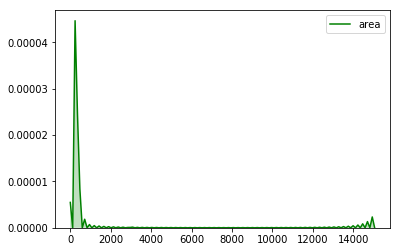

In [6]:
sns.kdeplot(df['area'],shade=True,color='g',cut=0)
plt.show()

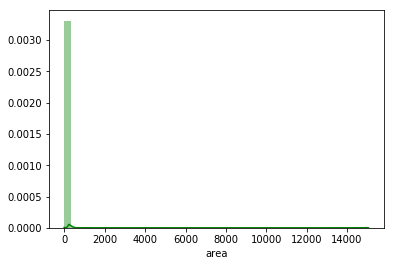

In [7]:
sns.distplot(df['area'],color='g')
plt.show()

我们统计下房屋面积的大小分布

In [8]:
df['area'].describe()

count    43909.000000
mean        71.244632
std         85.891320
min          1.000000
25%         43.260000
50%         65.300000
75%         90.000000
max      15055.000000
Name: area, dtype: float64

In [9]:
df[['area','tradeMoney']].sort_values(ascending=False,by='area')[:10]

,area,tradeMoney
2752,15055.00,11200.0
29693,3000.00,2350.0
297,1048.63,50000.0
6517,850.00,38000.0
1473,831.73,20000.0
34084,798.86,125000.0
570,742.00,100000.0
17773,708.00,50000.0
16877,689.67,53000.0
6987,638.45,88000.0


- 从上面的结果来看，发现最大的房屋面积为15055平方米，相当于1.5个足球场，价格却不是很贵。
- 还有面积为1平方米的，这个有点不正常

### 2 rentType
出租方式类别

In [10]:
df['rentType'].value_counts()

未知方式    32944
整租       5736
合租       5224
--          5
Name: rentType, dtype: int64

我们可以看到，有接近80%的房屋不知道出租方式，其中还有5个--，我们将其处理为未知方式

In [11]:
df['rentType']=df['rentType'].replace('--','未知方式')

In [12]:
df['rentType'].value_counts()

未知方式    32949
整租       5736
合租       5224
Name: rentType, dtype: int64

我们再看下整租和合租的价格分布

In [13]:
df[df['rentType']=='整租']['tradeMoney'].describe().astype('int')

count        5472
mean        24393
std       1351773
min             0
25%          3660
50%          4660
75%          6500
max      99999999
Name: tradeMoney, dtype: int64

In [14]:
df[df['rentType']=='合租']['tradeMoney'].describe().astype('int')

count    5204
mean     2063
std       625
min       630
25%      1630
50%      1990
75%      2430
max      5360
Name: tradeMoney, dtype: int64

我们发现存在整租一些异常值，比如99999999(这是天安门吗？)， 还有一些最小值，比如0.。合租的数据还可以。我们稍后处理下tradeMoney的异常值

### 3 houseType
房屋类型，房屋的形状

In [15]:
df['houseType'].value_counts()[:30]

1室1厅1卫    10382
2室1厅1卫     9153
2室2厅1卫     7269
3室1厅1卫     4091
3室2厅2卫     2951
3室2厅1卫     2050
4室1厅1卫     1971
1室0厅1卫     1365
1室2厅1卫      979
2室2厅2卫      948
2室0厅1卫      461
4室2厅2卫      453
4室2厅3卫      278
5室1厅1卫      200
2室1厅2卫      164
3室2厅3卫      153
3室1厅2卫      144
1室0厅0卫       89
6室1厅1卫       65
4室2厅4卫       62
5室2厅3卫       54
1室1厅2卫       42
4室2厅1卫       40
5室2厅2卫       35
4室3厅4卫       34
4室3厅3卫       34
5室3厅3卫       30
5室2厅4卫       30
4室1厅2卫       23
3室0厅1卫       21
Name: houseType, dtype: int64

我们可以看到房屋类型种类特别多，我们可以根据种类计数，重新对房屋类型进行编码，以区分当前房屋是否为常见房屋类型。

In [16]:
# keys=df['houseType'].value_counts().index.tolist()
# values=df['houseType'].value_counts().values.tolist()
# house_type_nums=dict(zip(keys,values))
house_type_nums=df['houseType'].value_counts().to_dict()

In [17]:
def check_type(x):
    if house_type_nums[x]>=1000:
        return "high_num"
    elif house_type_nums[x]<1000 and house_type_nums[x]>=100:
        return "median_num"
    else:
        return "low_num"
df['houseType']=df['houseType'].apply(lambda x:check_type(x))
df['houseType'].value_counts()

high_num      39232
median_num     3780
low_num         897
Name: houseType, dtype: int64

### 4 houseFloor 
所在楼层

In [18]:
df['houseFloor'].value_counts()

中    16389
高    14908
低    12612
Name: houseFloor, dtype: int64

中高层数量差不多，但是我们知道楼层高的话可能稍微便宜一些，所以我们编码的时候采取有次序的编码，这个我们稍后做统一的处理

### 5 totalFloor
总楼层数

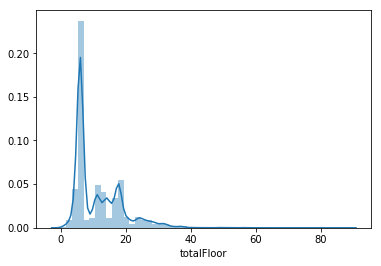

In [19]:
sns.distplot(df['totalFloor'])
plt.show()

In [20]:
df['totalFloor'].describe()

count    43909.000000
mean        11.377349
std          7.354010
min          0.000000
25%          6.000000
50%          7.000000
75%         16.000000
max         88.000000
Name: totalFloor, dtype: float64

我们发现楼层数数量为0的，我们看下这部分数据房间所在的楼层数

In [21]:
df[df['totalFloor']==0]['houseFloor']

5434     低
16232    低
21855    低
35478    低
38137    低
Name: houseFloor, dtype: object

### 6 houseToward
房屋朝向

In [22]:
df['houseToward'].value_counts()

南       35043
南北       2784
暂无数据     2136
北        2043
东南        658
东         553
西南        323
西         275
西北         70
东西         24
Name: houseToward, dtype: int64

### 7 houseDecoration
房屋装修

In [23]:
df['houseDecoration'].value_counts()

其他    31021
精装    11288
简装     1273
毛坯      327
Name: houseDecoration, dtype: int64

## 小区信息
### 8  communityName
小区名称

In [24]:
df['communityName'].value_counts()

XQ01834    359
XQ01274    193
XQ02273    189
XQ03110    186
XQ02337    174
XQ01389    167
XQ01658    164
XQ02789    153
XQ00530    152
XQ01561    152
XQ01339    133
XQ01873    123
XQ00826    123
XQ02296    122
XQ01232    120
XQ01401    119
XQ02441    118
XQ00196    116
XQ01207    110
XQ02365    110
XQ01410    109
XQ00852    106
XQ02072    104
XQ01672    104
XQ01642    100
XQ01634    100
XQ01375    100
XQ01970     97
XQ00210     94
XQ00424     93
          ... 
XQ01931      1
XQ01156      1
XQ02949      1
XQ00081      1
XQ00224      1
XQ02505      1
XQ00699      1
XQ03746      1
XQ00709      1
XQ04029      1
XQ02189      1
XQ03572      1
XQ02020      1
XQ02227      1
XQ02383      1
XQ00284      1
XQ02860      1
XQ02412      1
XQ01655      1
XQ02408      1
XQ01206      1
XQ01734      1
XQ02419      1
XQ00353      1
XQ02772      1
XQ03881      1
XQ02415      1
XQ00030      1
XQ03839      1
XQ02978      1
Name: communityName, Length: 4236, dtype: int64

我们发现有四千多个小区，这个应该是比较重要的特征，比如一个小区的租房价格整体比较贵

### 9 city
城市

In [25]:
df['city'].value_counts()

SH    43909
Name: city, dtype: int64

可以看到只有上海这一个城市，所以不要这个特征

### 10 region
城市行政区域

In [26]:
df['region'].value_counts()

RG00002    12161
RG00005     6050
RG00003     4364
RG00010     3834
RG00012     3630
RG00004     3486
RG00006     2016
RG00007     1752
RG00008     1336
RG00013     1312
RG00001     1234
RG00014     1155
RG00011      836
RG00009      742
RG00015        1
Name: region, dtype: int64

In [27]:
df[['region','tradeMoney']].groupby("region").mean().sort_values(ascending=False,by="tradeMoney")

,tradeMoney
region,
RG00002,15059.614059
RG00005,14162.471162
RG00013,8433.372016
RG00009,7718.173275
RG00008,7022.754400
RG00011,6639.276166
RG00001,5510.984443
RG00014,5109.809167
RG00007,4867.021739


从这里可以看出差异比较大，各个区域的租房平均差别比较大

### 11 plate
板块，区域板块

In [28]:
df['plate'].value_counts()

BK00031    2013
BK00033    1929
BK00045    1894
BK00055    1665
BK00056    1641
BK00052    1474
BK00054    1370
BK00017    1365
BK00041    1323
BK00051    1307
BK00046    1264
BK00035    1217
BK00042    1181
BK00009    1082
BK00050    1023
BK00043     982
BK00026     956
BK00047     926
BK00034     902
BK00013     891
BK00053     860
BK00028     824
BK00060     715
BK00010     715
BK00040     703
BK00029     688
BK00018     651
BK00062     648
BK00022     645
BK00064     639
           ... 
BK00037     475
BK00012     455
BK00024     433
BK00038     425
BK00020     403
BK00002     388
BK00027     380
BK00039     365
BK00065     363
BK00057     294
BK00063     292
BK00015     271
BK00006     250
BK00007     246
BK00030     240
BK00021     237
BK00066     232
BK00008     223
BK00049     220
BK00004     209
BK00048     175
BK00025     170
BK00023     139
BK00059     130
BK00044     105
BK00016      43
BK00036      34
BK00058      15
BK00032       3
BK00001       1
Name: plate, Length: 66,

In [29]:
df[['plate','tradeMoney']].groupby("plate").mean().sort_values(ascending=False,by="tradeMoney")[:20]

,tradeMoney
plate,
BK00060,160850.506692
BK00034,64401.102473
BK00008,16577.309524
BK00037,10932.583333
BK00036,10752.000000
BK00006,10700.974026
BK00063,10356.106762
BK00051,10070.687949
BK00061,10039.262055


从上面可以看出不同板块，房价也相差比较大

### 12 buildYear

In [49]:
df['buildYear'].value_counts()[:20]

1994    3029
暂无信息    2936
2006    2106
2007    1932
2008    1931
2005    1915
2010    1847
1995    1818
1993    1634
2011    1568
2004    1510
2009    1329
2014    1303
2003    1242
1997    1217
2002    1192
2012    1119
1996    1070
2000     988
2001     948
Name: buildYear, dtype: int64

In [31]:
df[['buildYear','tradeMoney']].groupby("buildYear").mean().sort_values(ascending=False,by="tradeMoney")[:20]

,tradeMoney
buildYear,
2003,94050.401375
1994,21719.523325
2017,21595.428571
2008,10586.965928
2002,7266.141964
1931,7223.363636
1998,6708.814461
2016,6576.642857
1950,6500.000000


- 后来发现只要小区的名字一样，那么构建年份一样的，同样地；假如小区名字一样，如果有一个数据年份未知，那么同一个小区的构建年份未知；我们可以尝试使用。
- 我们把范围扩大到地域加上板块（其实我们发现只要板块确定了，那么地域也确定了，是一个多对一的关系），我们可以根据相同地域下的不同板块的年份来填充“未知信息”


In [67]:
df[['plate','buildYear']].groupby("plate")['buildYear'].value_counts()

plate    buildYear
BK00001  1986           1
BK00002  1995          78
         2011          48
         1994          33
         2003          32
         2006          28
         2014          27
         1993          26
         2013          25
         1960          23
         1999          22
         1997          13
         2012           8
         2004           5
         暂无信息           5
         1991           4
         1996           4
         1992           3
         2000           2
         2008           1
         2010           1
BK00003  2004         101
         2003          74
         1997          62
         2006          62
         1994          48
         2000          40
         2002          35
         1998          24
         1993          22
                     ... 
BK00064  2014           2
         1974           1
         1976           1
BK00065  1993         130
         1994         107
         1997          46
         1995      

In [69]:
# for index,group in df[['plate','buildYear']].groupby("plate"):
#     print(index,'-----\n',group['buildYear'].value_counts())

### 13 saleSecHouseNum
该板块当月挂牌房源数

In [32]:
df['saleSecHouseNum'].value_counts()

0     31977
1      2411
2      2127
3      1696
4      1332
5       837
6       726
7       620
8       462
9       301
11      293
10      249
14      179
13      155
12      147
18       80
27       58
15       54
19       43
21       40
17       34
16       21
23       21
20       20
26       15
38        6
34        3
52        2
Name: saleSecHouseNum, dtype: int64

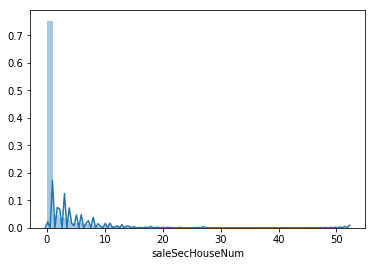

In [33]:
sns.distplot(df['saleSecHouseNum'])
plt.show()

In [34]:
# plt.plot(df['saleSecHouseNum'], df['tradeMoney'])
# plt.show()


## Y值分析 tradeMoney分析

In [35]:
import numpy as np
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train['tradeMoney'].astype(int).describe()

count      41440.000
mean        8837.074
std       551428.655
min            0.000
25%         2800.000
50%         4000.000
75%         5500.000
max     99999999.000
Name: tradeMoney, dtype: float64

房价前十

In [44]:
train['tradeMoney'].sort_values(ascending=False)[:50]

36710   99999999.990
32734   50000000.000
30167   10000000.000
33876     450000.000
29204     450000.000
22766     450000.000
1636      450000.000
35789     430000.000
22918     380000.000
21954     370000.000
29020     360000.000
19743     360000.000
3875      360000.000
39563     350000.000
3952      320000.000
5915      220000.000
1277      180500.000
34084     125000.000
30601     116000.000
570       100000.000
15226      95000.000
928        91666.000
3520       90000.000
28950      88600.000
2088       88000.000
6987       88000.000
36317      87600.000
1515       81971.000
5856       80000.000
31152      78800.000
36003      72000.000
35069      72000.000
25595      70000.000
39434      70000.000
35992      70000.000
29009      70000.000
5903       70000.000
5423       70000.000
33631      68000.000
23143      66500.000
39319      66000.000
1147       65000.000
38036      63000.000
313        60000.000
10234      60000.000
1262       60000.000
34764      58000.000
29514      57

In [37]:
train['tradeMoney'].sort_values(ascending=False)[-50:]

24389   600.000
4603    600.000
26709   600.000
39114   600.000
30004   530.000
38721   500.000
21170   500.000
7616    500.000
21790   500.000
17456   500.000
31840   500.000
38137   500.000
3798    500.000
32431   500.000
5434    500.000
1710    500.000
165     500.000
39287   430.000
24514   400.000
18282   370.000
37141   350.000
39204   320.000
17384   300.000
22480   300.000
4083    300.000
11508   300.000
24093   300.000
4415    300.000
16317   250.000
18671   230.000
8169    220.000
28513   210.000
1588    200.000
7844    160.000
15561   160.000
16911   160.000
22955   150.000
4185    140.000
7719    140.000
15795   140.000
34056   100.000
1215      0.000
7591      0.000
7692      0.000
24688     0.000
6485      0.000
6885      0.000
6493      0.000
2775      0.000
7638      0.000
Name: tradeMoney, dtype: float64

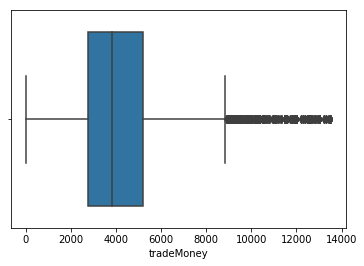

In [47]:
sns.boxplot(train['tradeMoney'].sort_values(ascending=False)[-40000:])
plt.show()

我们可从上面统计结果可看出租金存在一些异常值，比如tradeMoney有的会是0或者99999999

In [39]:
train.query("tradeMoney<=100000&tradeMoney>=500").head()

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,region,plate,buildYear,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,drugStoreNum,gymNum,bankNum,shopNum,parkNum,mallNum,superMarketNum,totalTradeMoney,totalTradeArea,tradeMeanPrice,tradeSecNum,totalNewTradeMoney,totalNewTradeArea,tradeNewMeanPrice,tradeNewNum,remainNewNum,supplyNewNum,supplyLandNum,supplyLandArea,tradeLandNum,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
0,100309852,68.060,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,SH,RG00001,BK00064,1953,0,7,36,0,28,1,1,12,15,16,76,5,3,22,355584000,7411.980,47974.226,111,810967373,7755,104573.485,25,264,0,0,0.000,0,0.000,0,0.000,28248,614,111546,1124.000,284.000,0,2018/11/28,2000.000
1,100307942,125.550,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,SH,RG00002,BK00049,2007,0,2,184,0,26,0,1,27,5,16,163,6,4,51,5000000,122.830,40706.668,2,9668955,286,33807.535,2,4,0,0,0.000,0,0.000,0,0.000,14823,148,157552,701.000,22.000,1,2018/12/16,2000.000
2,100307764,132.000,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,SH,RG00002,BK00050,暂无信息,3,6,60,1,43,2,3,24,35,37,85,6,4,30,1687284798,49071.300,34384.351,555,344894466,3143,109734.160,11,159,126,0,0.000,0,0.000,0,0.000,77645,520,131744,57.000,20.000,1,2018/12/22,16000.000
3,100306518,57.000,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,SH,RG00002,BK00051,暂无信息,0,3,364,2,60,1,8,83,30,47,358,3,1,131,468272888,22809.700,20529.551,260,196307819,6418,30587.071,58,730,0,1,108037.800,1,108037.800,332760000,3080.033,8750,1665,253337,888.000,279.000,9,2018/12/21,1600.000
4,100305262,129.000,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,SH,RG00003,BK00044,暂无信息,1,0,141,0,15,0,0,21,5,10,100,5,2,34,108851470,4463.620,24386.366,38,286722058,5608,51127.328,34,851,216,0,0.000,0,0.000,0,0.000,800,117,125309,2038.000,480.000,0,2018/11/18,2900.000


In [40]:
corr=train.corr()

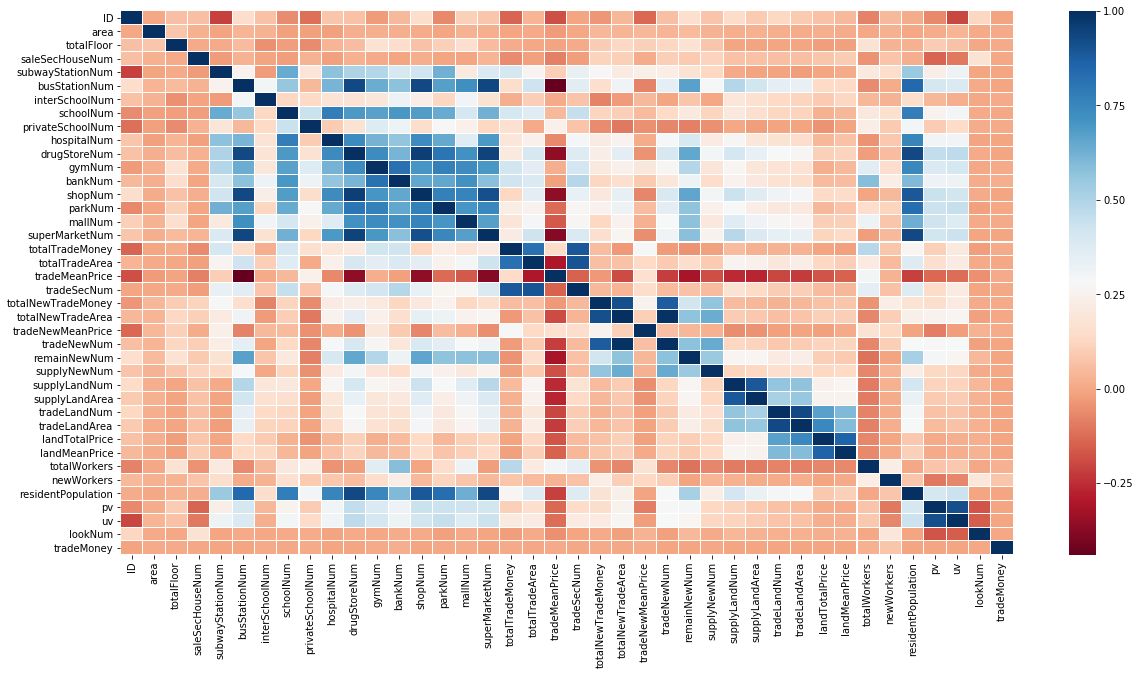

In [41]:
f, ax= plt.subplots(figsize = (20, 10))

sns.heatmap(corr,cmap='RdBu', linewidths = 0.05, ax = ax)
plt.show()

In [42]:
df.shape[0] - df.count()

ID                       0
area                     0
rentType                 0
houseType                0
houseFloor               0
totalFloor               0
houseToward              0
houseDecoration          0
communityName            0
city                     0
region                   0
plate                    0
buildYear                0
saleSecHouseNum          0
subwayStationNum         0
busStationNum            0
interSchoolNum           0
schoolNum                0
privateSchoolNum         0
hospitalNum              0
drugStoreNum             0
gymNum                   0
bankNum                  0
shopNum                  0
parkNum                  0
mallNum                  0
superMarketNum           0
totalTradeMoney          0
totalTradeArea           0
tradeMeanPrice           0
tradeSecNum              0
totalNewTradeMoney       0
totalNewTradeArea        0
tradeNewMeanPrice        0
tradeNewNum              0
remainNewNum             0
supplyNewNum             0
s